<p><font size="6"><b>Coordinate reference systems</b></font></p>

In [1]:
from matplotlib import *

from matplotlib import pyplot as plt
import matplotlib.cm as cm

import pandas as pd
import geopandas as gpd

In [26]:
italy_prov = gpd.read_file('../data/georef-italy-provincia/georef-italy-provincia-millesime.shp')


## Coordinate reference systems

Up to now, we have used the geometry data with certain coordinates without further wondering what those coordinates mean or how they are expressed.

> The **Coordinate Reference System (CRS)** relates the coordinates to a specific location on earth.

For an in-depth explanation, see https://docs.qgis.org/2.8/en/docs/gentle_gis_introduction/coordinate_reference_systems.html

### Geographic coordinates

> Degrees of latitude and longitude.
>
> E.g. 48°51′N, 2°17′E

The most known type of coordinates are geographic coordinates: we define a position on the globe in degrees of latitude and longitude, relative to the equator and the prime meridian. 
With this system, we can easily specify any location on earth. It is used widely, for example in GPS. If you inspect the coordinates of a location in Google Maps, you will also see latitude and longitude.

**Attention!**

in Python we use (lon, lat) and not (lat, lon)

- Longitude: [-180, 180]
- Latitude: [-90, 90]

### Projected coordinates

> `(x, y)` coordinates are usually in meters or feet

Although the earth is a globe, in practice we usually represent it on a flat surface: think about a physical map, or the figures we have made with Python on our computer screen.
Going from the globe to a flat map is what we call a *projection*.


We project the surface of the earth onto a 2D plane so we can express locations in cartesian x and y coordinates, on a flat surface. In this plane, we then typically work with a length unit such as meters instead of degrees, which makes the analysis more convenient and effective.

However, there is an important remark: the 3 dimensional earth can never be represented perfectly on a 2 dimensional map, so projections inevitably introduce distortions. To minimize such errors, there are different approaches to project, each with specific advantages and disadvantages.

Some projection systems will try to preserve the area size of geometries, such as the Albers Equal Area projection. Other projection systems try to preserve angles, such as the Mercator projection, but will see big distortions in the area. Every projection system will always have some distortion of area, angle or distance.



## Coordinate Reference Systems in Python / GeoPandas

A GeoDataFrame or GeoSeries has a `.crs` attribute which holds (optionally) a description of the coordinate reference system of the geometries:

In [3]:
italy_prov.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

For the `countries` dataframe, it indicates that it uses the EPSG 4326 / WGS84 lon/lat reference system, which is one of the most used for geographic coordinates.


It uses coordinates as latitude and longitude in degrees, as can you be seen from the x/y labels on the plot:

<Axes: >

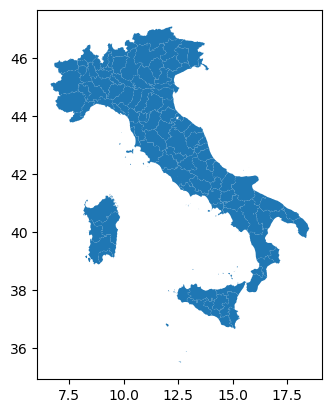

In [4]:
italy_prov.plot()

The `.crs` attribute returns a `pyproj.CRS` object. To specify a CRS, we typically use some string representation:


- **EPSG code**
  
  Example: `EPSG:4326` = WGS84 geographic CRS (longitude, latitude)

See eg https://epsg.io/4326

Under the hood, GeoPandas uses the `pyproj` / `PROJ` libraries to deal with the re-projections.

For more information, see also http://geopandas.readthedocs.io/en/latest/projections.html.

### Transforming to another CRS

We can convert a GeoDataFrame to another reference system using the `to_crs` function. 

For example, let's convert the countries to the local Mercator Projection (https://epsg.io/3003):

In [8]:
italy_prov_mercator = italy_prov.to_crs(epsg=3003)  # or .to_crs("EPSG:3003") 

<Axes: >

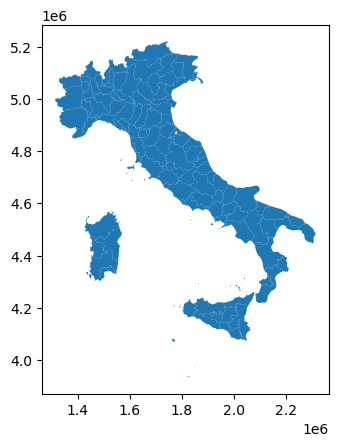

In [9]:
italy_prov_mercator.plot()

Note the different scale of x and y.

### Why using a different CRS?

There are sometimes good reasons you want to change the coordinate references system of your dataset, for example:

- Different sources with different CRS -> need to convert to the same crs

    ```python
    df1 = geopandas.read_file(...)
    df2 = geopandas.read_file(...)

    df2 = df2.to_crs(df1.crs)
    ```

- Mapping (distortion of shape and distances)

- Distance / area based calculations -> ensure you use an appropriate projected coordinate system expressed in a meaningful unit such as meters or feet (not degrees).

<div class="alert alert-info" style="font-size:120%">

**ATTENTION:**

All the calculations that happen in GeoPandas and Shapely assume that your data is in a 2D cartesian plane, and thus the result of those calculations will only be correct if your data is properly projected.

</div>

## Let's practice!

Up to now, we provided the datasets in an appropriate projected CRS for the exercises. But the original data were actually using geographic coordinates. In the following exercises, we will start from there.

---


<div class="alert alert-success">

**EXERCISE 1: Projecting a GeoDataFrame**

* Calculate the area of all provices in the original dataset in lat,lon.
* Calculate the area of all provices in the new dataset projected in epsg=3003.
* Create a new column in the dataset with the areas.
* Plot the two datasets and color the map using the "area" columns.
* Make a scatter plot comparing the two areas
    
<details><summary>Hints</summary>

* The CRS information is stored in the `.crs` attribute of a GeoDataFrame.
* Making a simple plot of a GeoDataFrame can be done with the `.plot()` method.
* Converting to a different CRS can be done with the `.to_crs()` method, and the CRS can be specified as an EPSG number using the `epsg` keyword.

</details>

</div>